# Bag-of-words example

This notebook is a brief introduction to using bag of words. It is not meant as a guide to building a good Natural Language Processing network (it doesn't).

The data used in this example is from Kaggle's Disaster Tweets: https://www.kaggle.com/competitions/nlp-getting-started/overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

tweets = pd.read_csv('train.csv')

tweets

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


The target is 1, if the tweet is about a disaster, and 0 otherwise. We'll try to 

Since this is about NLP, I'll just use the text even though the keyword looks useful.

The CountVectorizer finds all distinct words in the body of text (that is, all the rows). It returns a vector for each input text. The vector has a word count for how many times the word occured in the input text.

Note the conversions to numpy arrays. Keras is none to happy with Pandas Dataframes.

The shape of _X_ reveals that we have 7613 vectors (texts) and 21637 distinct words.

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

y = np.array(tweets['target'])
X = vectorizer.fit_transform(tweets['text']).toarray()
X.shape

(7613, 21637)

In [3]:
from sklearn.model_selection import train_test_split

X_, X_test, y_, y_test = train_test_split(X, y, train_size=.8, random_state=504)
X_train, X_validate, y_train, y_validate = train_test_split(X_, y_, train_size=.75, random_state=504)

The ANN below is horribly overfitting (never a good sign when validation loss is increasing), but I'll leave it here. 

Note how the input dimension is related to the shape of the input.

Also note that this had two hidden layers, where the portfolio exercise requires one.

In [4]:
import tensorflow as tf
from tensorflow.keras import layers

ann = tf.keras.Sequential([
    layers.Dense(units=100, input_dim=X.shape[1], activation='relu'),
    layers.Dense(units=100, activation='relu'),
    layers.Dense(units=1, activation='sigmoid')
])

ann.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy']) 

In [5]:
es = tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)

history = ann.fit(X_train, y_train, epochs = 100, validation_data=(X_validate, y_validate), callbacks=[es])


Epoch 1/100
143/143 [==============================] - 6s 34ms/step - loss: 0.5108 - accuracy: 0.7683 - val_loss: 0.4565 - val_accuracy: 0.7905
Epoch 2/100
143/143 [==============================] - 4s 27ms/step - loss: 0.1732 - accuracy: 0.9326 - val_loss: 0.5998 - val_accuracy: 0.7610
Epoch 3/100
143/143 [==============================] - 4s 27ms/step - loss: 0.0710 - accuracy: 0.9733 - val_loss: 0.8716 - val_accuracy: 0.7538
Epoch 4/100
143/143 [==============================] - 4s 27ms/step - loss: 0.0462 - accuracy: 0.9818 - val_loss: 0.8166 - val_accuracy: 0.7676
Epoch 5/100
143/143 [==============================] - 4s 28ms/step - loss: 0.0359 - accuracy: 0.9866 - val_loss: 1.2120 - val_accuracy: 0.7708
Epoch 6/100
143/143 [==============================] - 4s 27ms/step - loss: 0.0246 - accuracy: 0.9895 - val_loss: 1.1023 - val_accuracy: 0.7676
Epoch 7/100
143/143 [==============================] - 4s 30ms/step - loss: 0.0211 - accuracy: 0.9906 - val_loss: 1.3477 - val_accuracy:

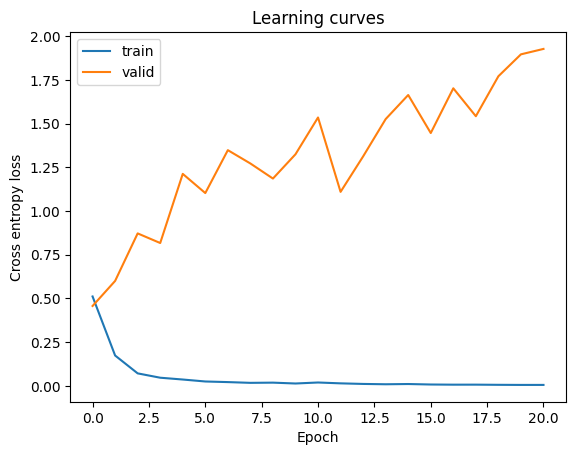

In [6]:
plt.figure()
plt.title("Learning curves")
plt.xlabel("Epoch")
plt.ylabel("Cross entropy loss")
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'valid')
plt.legend()
plt.show()